In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as scp

In [47]:
train=pd.read_csv('Data/bike-sharing-demand/train.csv')
test=pd.read_csv('Data/bike-sharing-demand/test.csv')

In [48]:
train.shape

(10886, 12)

In [49]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [51]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [53]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

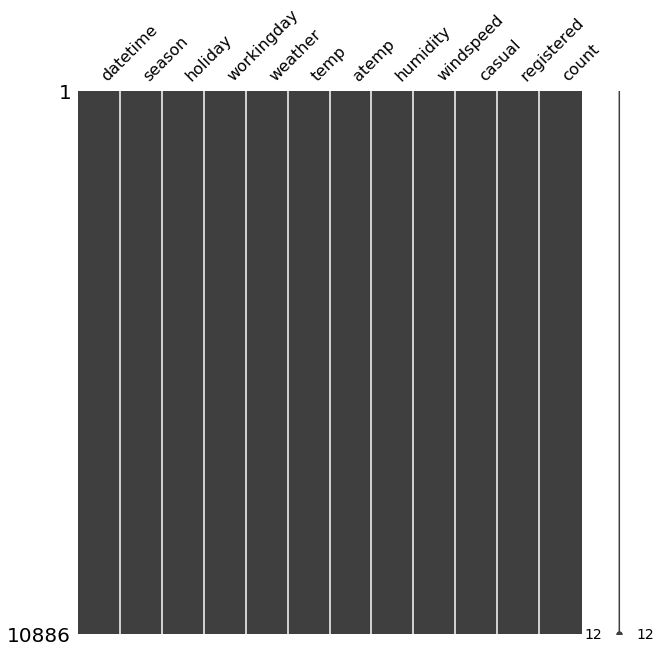

In [54]:
import missingno as msno
msno.matrix(train,figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023969350160>,
      dtype=object)

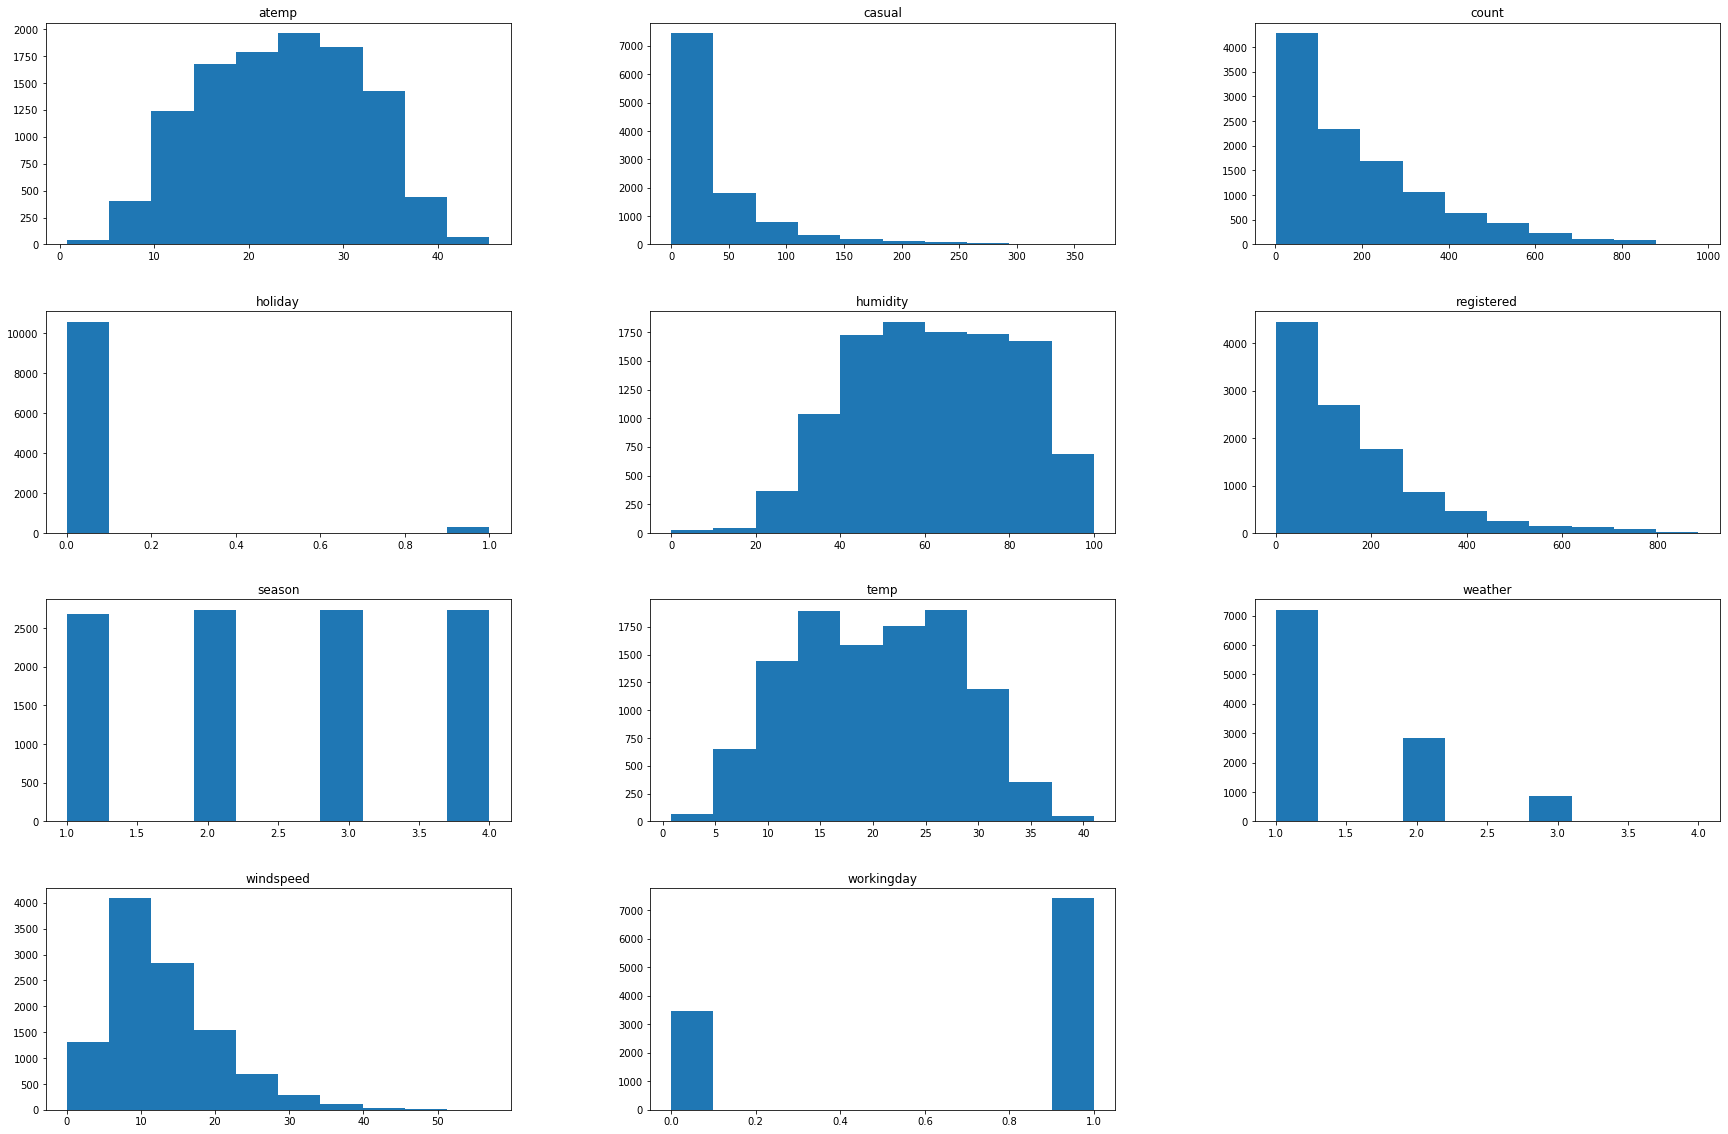

In [55]:
train.hist(figsize=(30,20),grid=False)

In [56]:
train['datetime'] = pd.to_datetime(train['datetime'], errors='coerce')
train["year"]=train["datetime"].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

(10886, 18)

In [57]:
test['datetime']=pd.to_datetime(test['datetime'])
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek

In [58]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


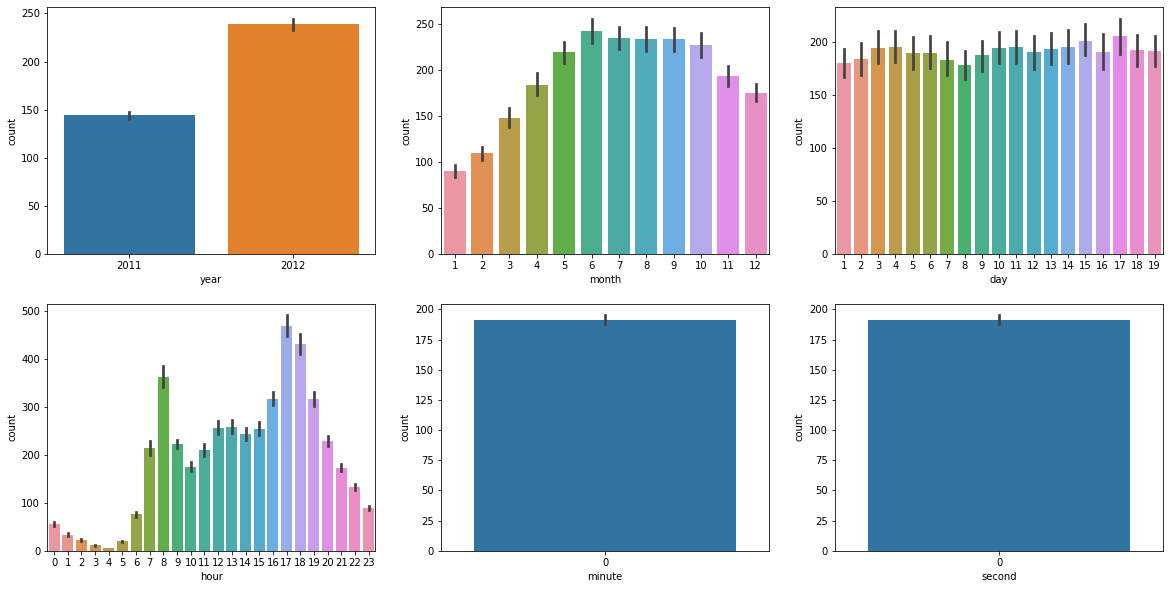

In [59]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(20,10)

sns.barplot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count',ax=ax3)
sns.barplot(data=train,x='hour',y='count',ax=ax4)
sns.barplot(data=train,x='minute',y='count',ax=ax5)
sns.barplot(data=train,x='second',y='count',ax=ax6)
#날짜는 19일까지 있으므로 사용 불가
#11년보다 12년에 많이 탐, 여름에 많이 탐, 새벽보다 출퇴근 시간 많이 탐
#분, 초 의미 없음

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Holiday')]

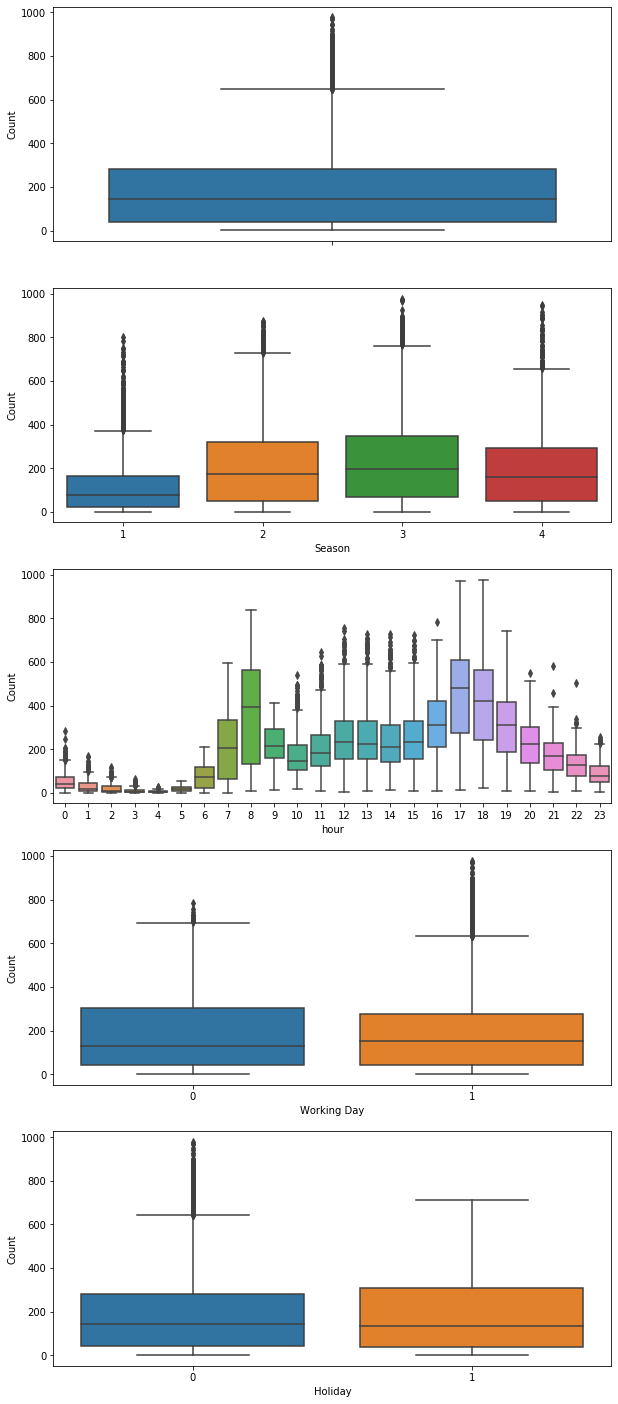

In [60]:
fig, (axes1,axes2,axes3,axes4,axes5)=plt.subplots(nrows=5)
fig.set_size_inches(10,25)
sns.boxplot(data=train,y='count',ax=axes1)
sns.boxplot(data=train,y='count',x='season',ax=axes2)
sns.boxplot(data=train,y='count',x='hour',ax=axes3)
sns.boxplot(data=train,y='count',x='workingday',ax=axes4)
sns.boxplot(data=train,y='count',x='holiday',ax=axes5)
axes1.set(ylabel="Count")
axes2.set(xlabel="Season",ylabel="Count")
axes3.set(xlabel="hour",ylabel="Count")
axes4.set(xlabel="Working Day",ylabel="Count")
axes5.set(xlabel="Holiday",ylabel="Count")

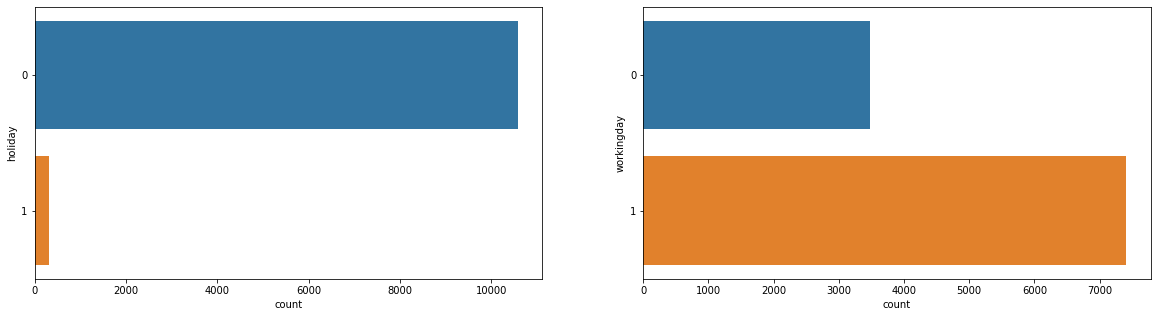

In [61]:
feature,(ax1,ax2)=plt.subplots(ncols=2)
feature.set_size_inches(20,5)
sns.countplot(y='holiday',data=train,ax=ax1)
sns.countplot(y='workingday',data=train,ax=ax2)

In [62]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [63]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

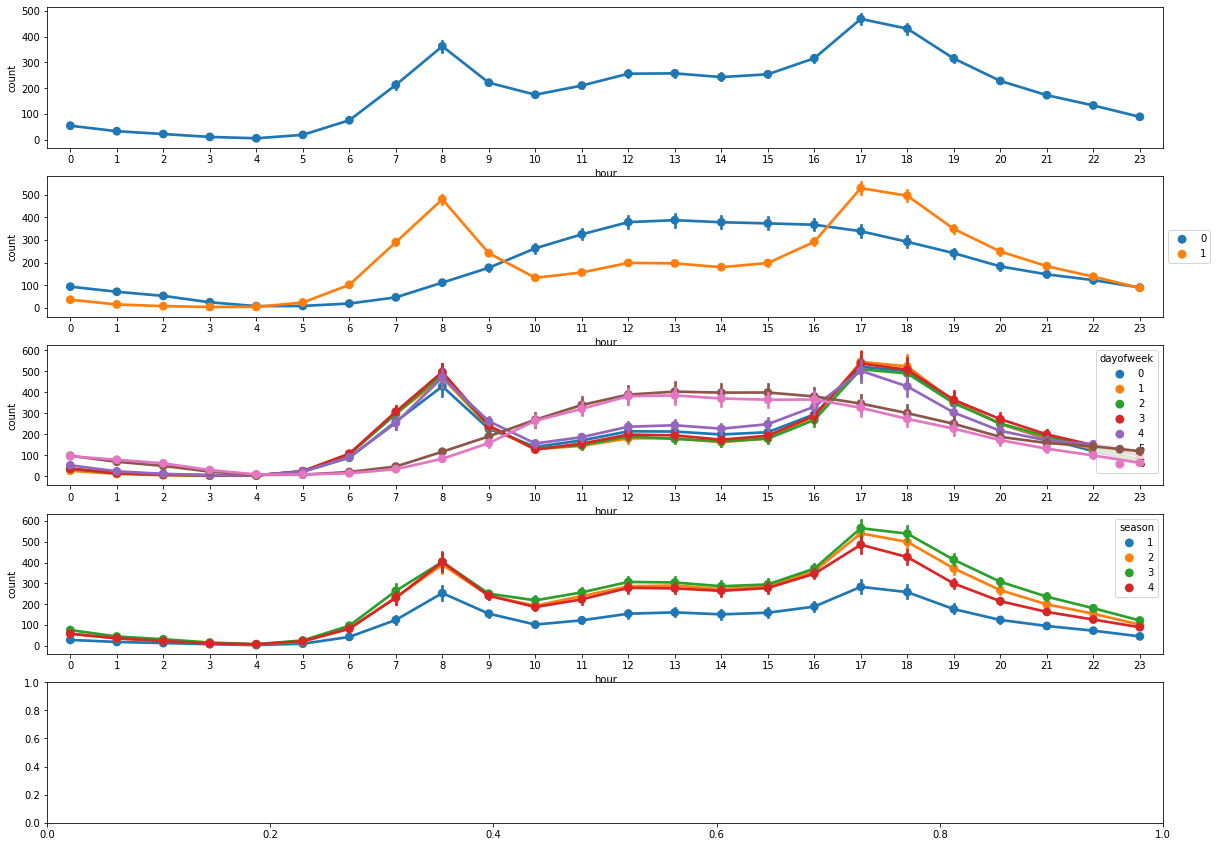

In [64]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(20,15)
sns.pointplot(data=train,x='hour',y='count',ax=ax1)
sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax2).legend(loc='center left',bbox_to_anchor=(1,0.5))
sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=ax3)
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax4)
#sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=ax5)

In [65]:
import numpy as np
corrMat=train[['temp','atemp','humidity','windspeed','casual','registered','count']]
corrMat=corrMat.corr()
print(corrMat)
mask=np.array(corrMat)
mask[np.tril_indices_from(mask)]=False

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000  


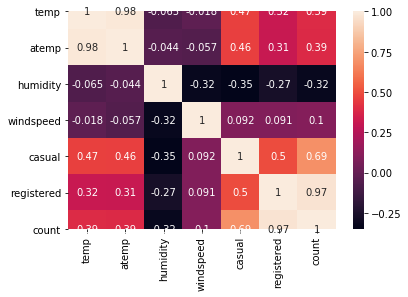

In [66]:
fig.ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMat,annot=True)
#온도, 습도, 풍속은 거의 연관관계가 없다.
#대여량과 가장 연관이 높은건 registered로 등록된 대여자가 많지만 test데이터에는 이 값이 없다.
#atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처에 사용하기에 적합하지 않을 수 있다.

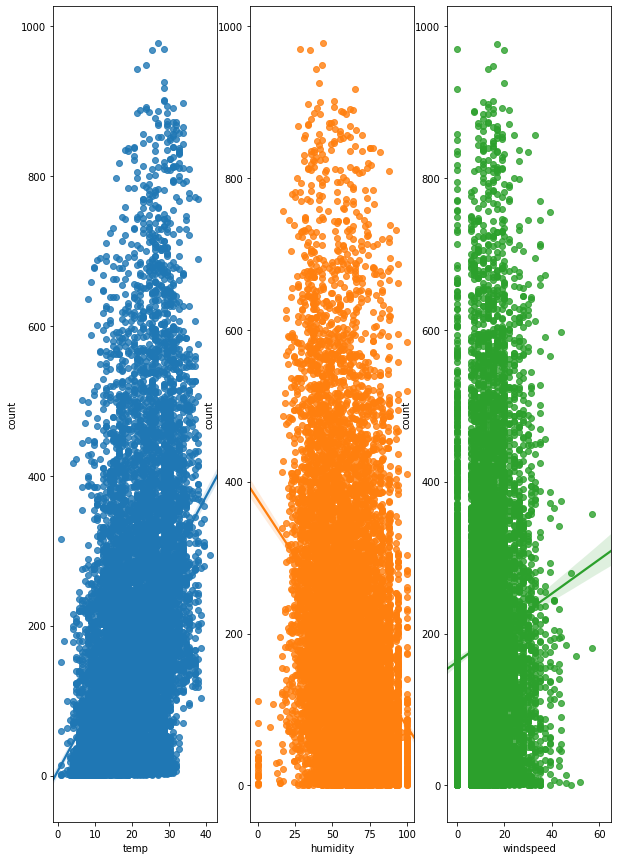

In [67]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(10,15)
sns.regplot(x='temp',y='count',data=train,ax=ax1)
sns.regplot(x='humidity',y='count',data=train,ax=ax2)
sns.regplot(x='windspeed',y='count',data=train,ax=ax3)
#풍속은 0에 몰려있음
#아마 관측되지 않은 값으로 추측

In [68]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)
train["year_month"]=train["datetime"].apply(concatenate_year_month)
print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


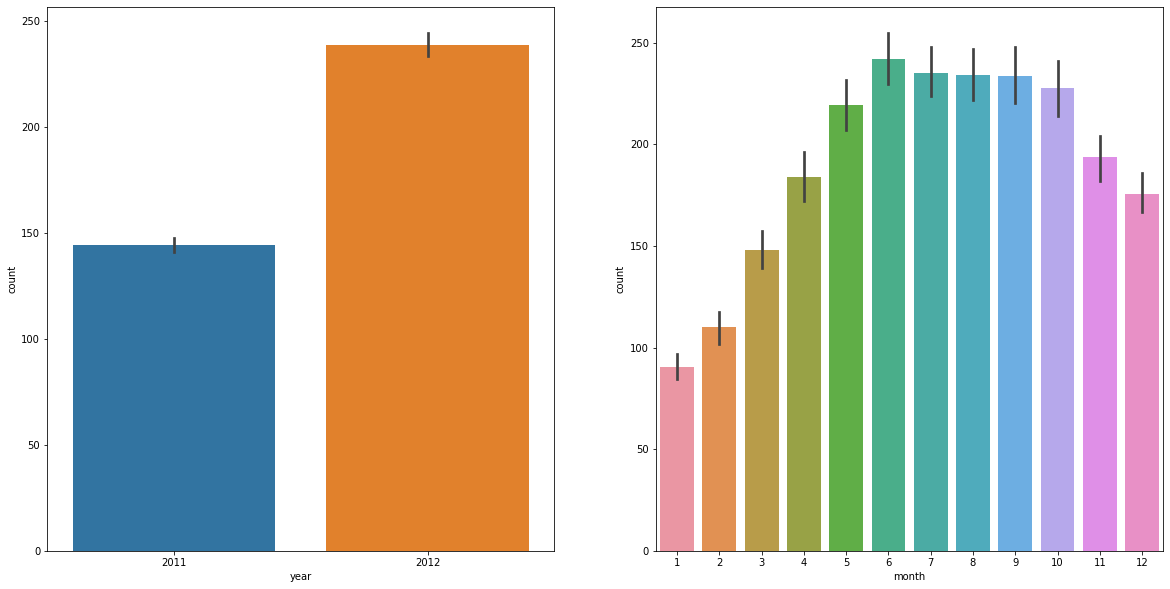

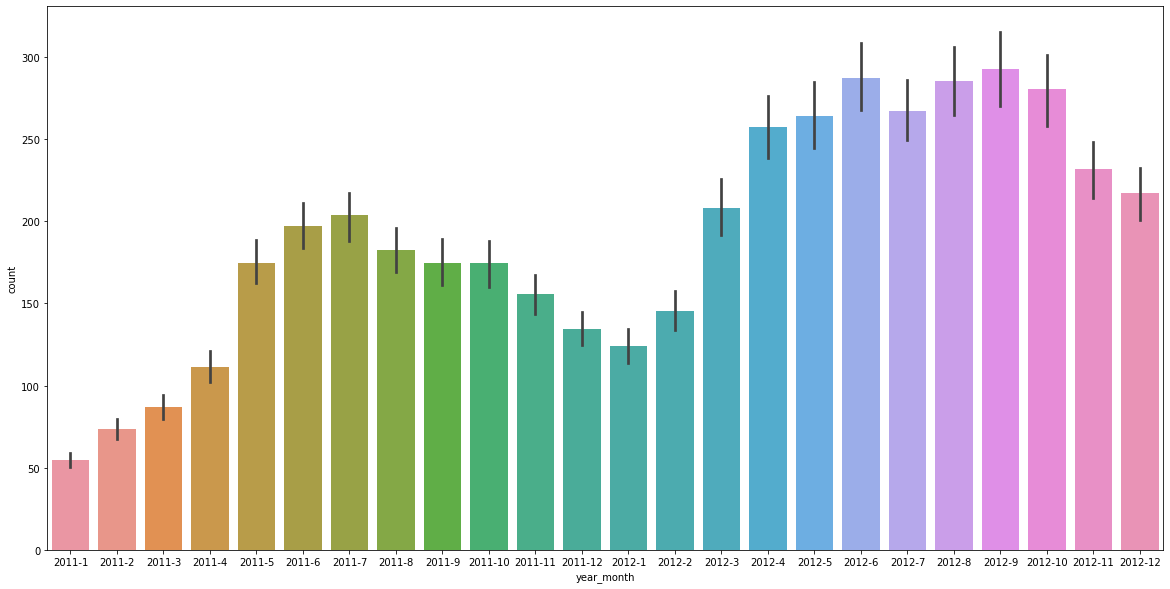

In [69]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,10)
sns.barplot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)
fig, ax3=plt.subplots(nrows=1)
fig.set_size_inches(20,10)
sns.barplot(data=train,x='year_month',y='count',ax=ax3)
#2011년보다 2012년이 많다
#겨울보다는 여름에 많다
#전체적으로 증가하는 추세이다

In [70]:
#아웃라이어 데이터 제거
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542908, 4.523106928071492, 0.9537631807794263))

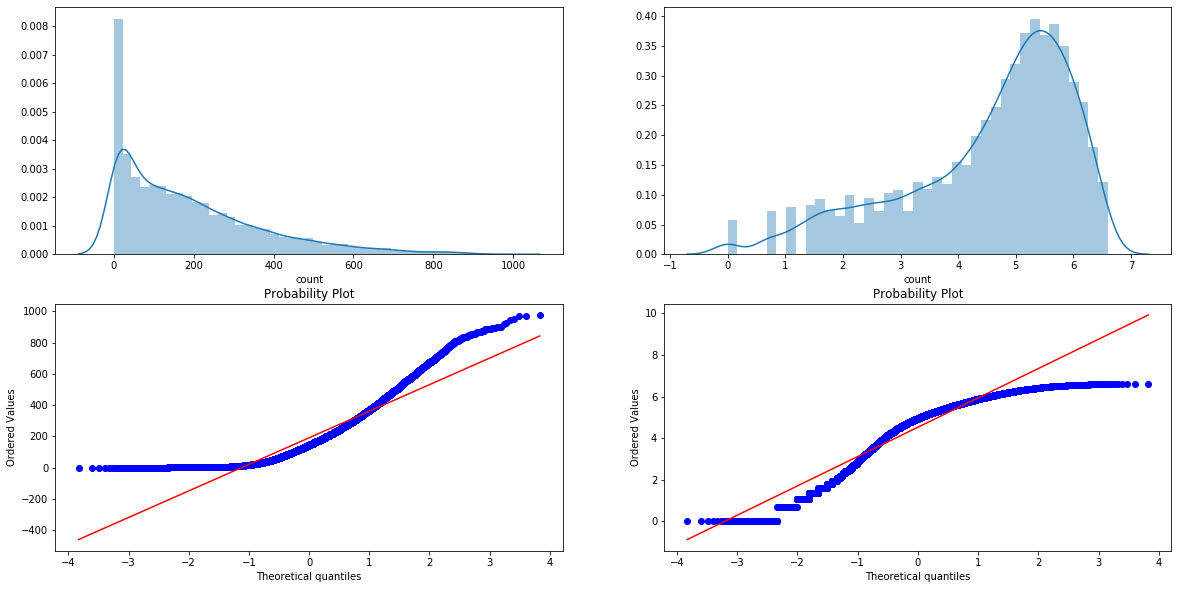

In [71]:
fig,axes=plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20,10)
sns.distplot(train['count'],ax=axes[0][0])
scp.probplot(train['count'],fit=True,plot=axes[1][0])
sns.distplot(np.log(trainWithoutOutliers['count']),ax=axes[0][1])
scp.probplot(np.log(trainWithoutOutliers['count']),plot=axes[1][1])

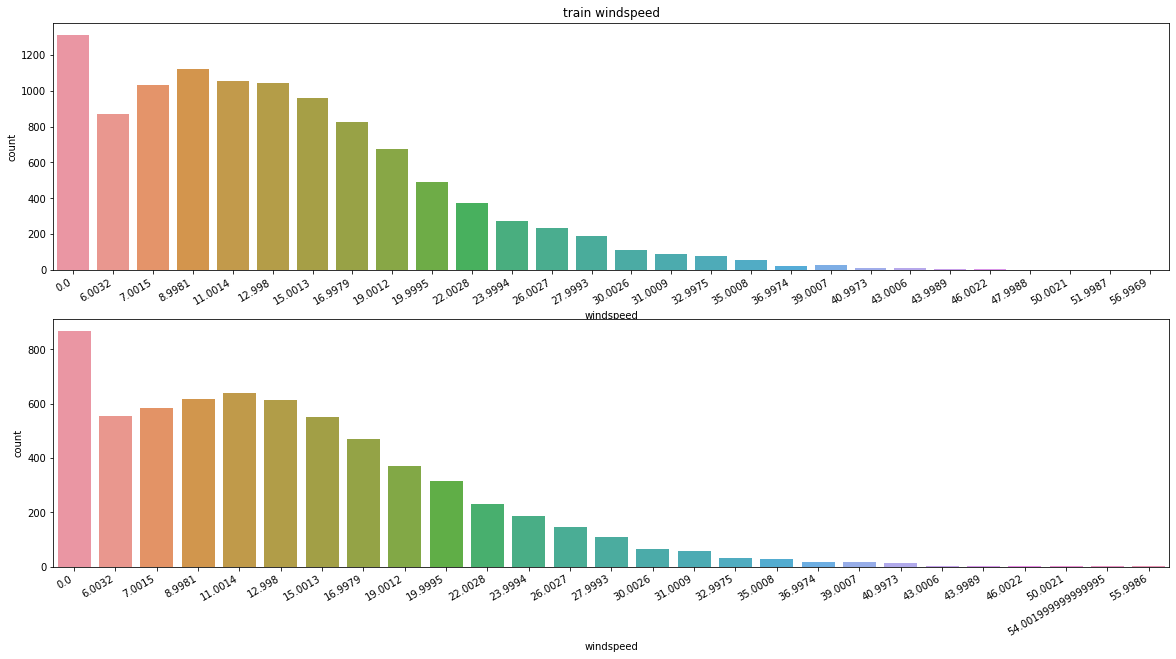

In [72]:
fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
plt.sca(axes[0])
plt.xticks(rotation=30,ha='right')
axes[0].set(ylabel='count',title='train windspeed')
sns.countplot(data=train,x='windspeed',ax=axes[0])

plt.sca(axes[1]) #sca는 현재 ax를 가리키는 표시
plt.xticks(rotation=30,ha='right')
sns.countplot(data=test,x='windspeed',ax=axes[1])

In [73]:
#풍속의 0 값에 특정 값을 넣어준다.
#평균을 구해 일괄적으로 넣어 줄수 있지만 정확도 높이는데 도움이 되지 않음
trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


In [74]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    #풍속을 예측할 피처 선택
    wCol=["season","weather","humidity","month","temp","atemp","year"]
    
    #풍속이 0이 아닌 데이터 들의 타입을 스트링으로 바꾼다.
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    
    #랜덤 포레스트 분류 사용
    rf_model_wind=RandomForestClassifier()
    
    #wCol에 있는 feature 값을 바탕으로 풍속 학습
    rf_model_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    
    #학습된 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측
    wind0Values=rf_model_wind.predict(X=dataWind0[wCol])
    
    #값을 다 예측 후 비교해 보기 위해 예측한 값을 넣어 줄 데이터 프레임을 새로 만듬
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    #값이 0으로 기록된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0['windspeed']=wind0Values
    
    #dataWinNot0 0이 아닌 풍속이 있는 데이터 프레임에 예측한 값이 있는 데이터 프레임을 합친다.
    data=predictWindNot0.append(predictWind0)
    
    #풍속의 데이터 타입을 float로 지정
    data['windspeed']=data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    return data

In [75]:
#0값을 조정한다.
train=predict_windspeed(train)

C:\Users\say2d\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\say2d\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


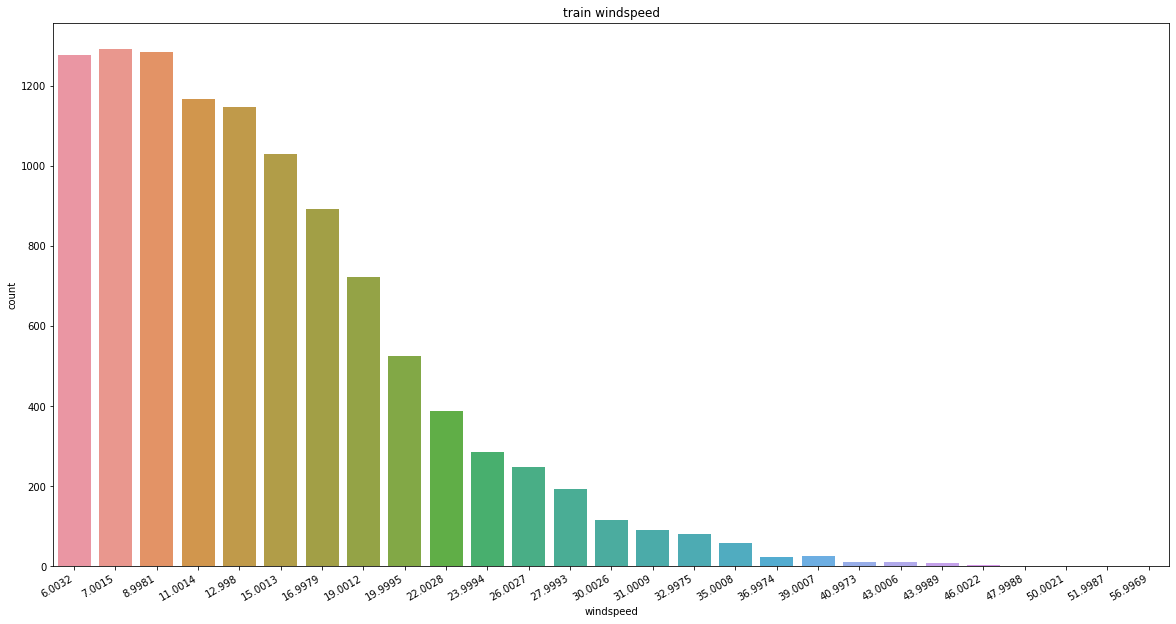

In [76]:
fig,ax1=plt.subplots()
fig.set_size_inches(20,10)
plt.sca(ax1)
plt.xticks(rotation=30,ha='right')
ax1.set(ylabel='count',title='train windspeed')
sns.countplot(data=train,x='windspeed',ax=ax1)

In [77]:
#feature selection
#연속형 feature와 범주형 feaure
#연속형 temp,humidity,windpeed,atemp
#범주형을 카테고리로 바꿔줌

categorical_feature_names=['season','holiday','workingday','weather','dayofweek','month','year','hour']
for var in categorical_feature_names:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

In [78]:
feature_names=["season","weather","temp","atemp","humidity","windspeed","year","hour","dayofweek","holiday","workingday"]

In [79]:
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [80]:
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [81]:
label_name="count"
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [103]:
from sklearn.metrics import mean_squared_error,make_scorer
def cal_rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

'''
def cal_rmse(predicted_values,actual_values):
    #return np.sqrt(mean_squared_error(y,y_pred))
     # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score'''

'\ndef cal_rmse(predicted_values,actual_values):\n    #return np.sqrt(mean_squared_error(y,y_pred))\n     # 넘파이로 배열 형태로 바꿔준다.\n    predicted_values = np.array(predicted_values)\n    actual_values = np.array(actual_values)\n\n    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.\n    log_predict = np.log(predicted_values + 1)\n    log_actual = np.log(actual_values + 1)\n\n    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.\n    difference = log_predict - log_actual\n    # difference = (log_predict - log_actual) ** 2\n    difference = np.square(difference)\n\n    # 평균을 낸다.\n    mean_difference = difference.mean()\n\n    # 다시 루트를 씌운다.\n    score = np.sqrt(mean_difference)\n\n    return score'

In [104]:
rmse=make_scorer(cal_rmse)
rmse

make_scorer(cal_rmse)

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True)

In [106]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [107]:
%time score=cross_val_score(model,X_train,y_train,cv=k_fold,scoring=rmse)
score=score.mean()

Wall time: 16.3 s


In [108]:
print("Score={0:.5f}".format(score))

Score=41.77616


In [109]:
#학습, 피팅
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [110]:
#예측
predictions=model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.19,   5.14,   4.23,   3.44,   3.07,   6.26,  38.09, 104.95,
       235.4 , 136.74])

[Text(0.5, 1.0, 'test')]

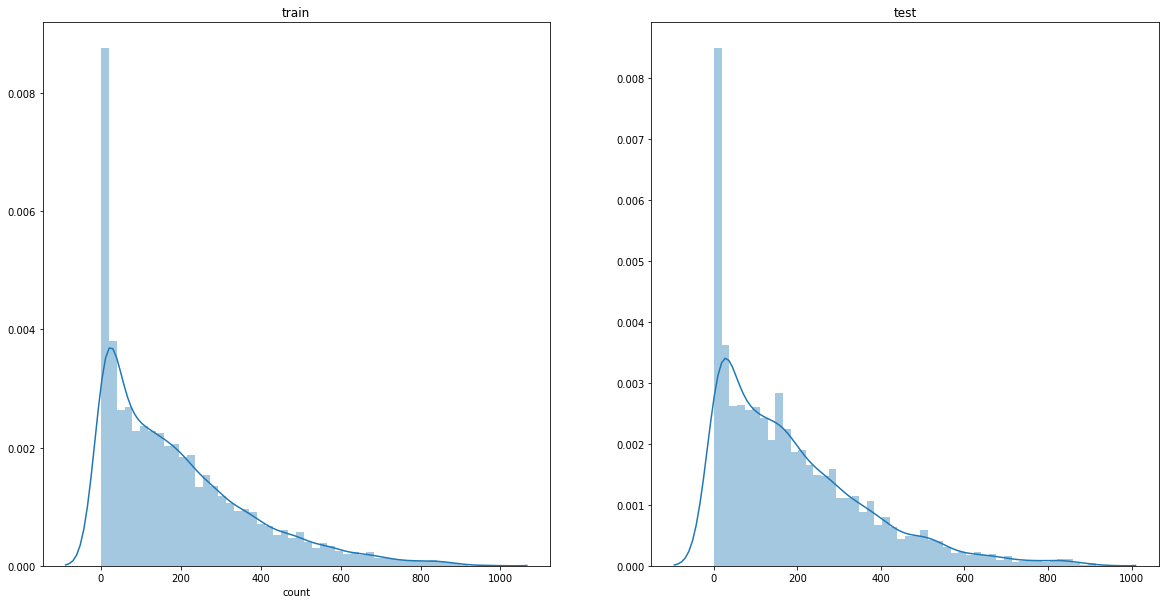

In [111]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(20,10)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [112]:
submission=pd.read_csv("Data/bike-sharing-demand/sampleSubmission.csv")
submission["count"]=predictions
print(submission.shape)
submission.head()
print(score)

(6493, 2)
41.7761550111171


In [92]:
submission.to_csv("Data/bike-sharing-demand/Score_{0:.5f}_submission.csv".format(score),index=False)